# Dependencias y modelo de embedding 

In [1]:
!pip install Ollama -q
!pip install langchain -q
!pip install langchain_community -q
!pip install pandas -q
!pip install datasets huggingface_hub -q
!pip install PyPDF2 -q
!pip install -U sentence-transformers -q
!pip install -U langchain-ollama -q
!pip install einops -q
!pip install matplotlib -q

In [4]:
import ollama
import pandas as pd
from langchain_community.llms import Ollama
from datasets import Dataset
import PyPDF2
from PyPDF2 import PdfReader
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from datasets import load_dataset
import matplotlib.pyplot as plt



### Seleccionar el modelo de embedding 

In [5]:
#model = SentenceTransformer('espejelomar/sentece-embeddings-BETO')
model = SentenceTransformer("nomic-ai/nomic-embed-text-v1", trust_remote_code=True)

<All keys matched successfully>


# Creación de embeddings del reglamento

In [6]:
with open("_Reglamento.txt", "r", encoding="utf-8") as file:
    texto  = file.read()

articulos = texto.split("Documento:")
articulos = ["Documento:" + articulo.strip() for articulo in articulos if articulo.strip()]
print(f"Existen {len(articulos)} artículos.")

Existen 674 artículos.


In [8]:
articles_embedding = []
for i,article in enumerate(articulos):
    article_embedding = model.encode(article)
    articles_embedding.append((i, article_embedding))

# Creación de preguntas similares

In [122]:
def generate_questions_3(pregunta_original):
    formatted_prompt = f"""
    Eres un experto en generar preguntas similares en español, específicamente relacionadas con el reglamento de una facultad universitaria. Tu tarea es:

    1. Tomar esta pregunta original extraída del reglamento de una universidad: "{pregunta_original}"
    2. Generar EXACTAMENTE 2 preguntas similares enfatizando sinónimos para los sustantivos relevantes, manteniendo el contexto académico y administrativo de una universidad.
    3. Presentar el resultado en el siguiente formato estricto, sin espacios adicionales entre líneas:

    {pregunta_original}
    [Primera pregunta similar]
    [Segunda pregunta similar]

    IMPORTANTE:
    - No incluyas NINGÚN texto adicional, comentario o aclaración.
    - Asegúrate de que haya EXACTAMENTE 3 preguntas en total (la original más 2 similares).
    - Mantén el significado y la intención de la pregunta original en todas las variaciones.
    - Todas las preguntas deben estar relacionadas con el contexto de reglamentos, procedimientos o políticas universitarias.
    - No dejes espacios adicionales entre las preguntas.

    Comienza ahora:
    """
    
    response = ollama.chat(model='llama3.1',
                           messages=[{'role': 'user', 'content': formatted_prompt}],
                           options={'temperature': 0})
    
    return response['message']['content']


In [35]:
def generate_questions_5(pregunta_original):
    formatted_prompt = f"""
    Eres un experto en generar preguntas similares en español, específicamente relacionadas con el reglamento de una facultad universitaria. Tu tarea es:

    1. Tomar esta pregunta original extraída del reglamento de una universidad: "{pregunta_original}"
    2. Generar EXACTAMENTE 4 preguntas similares enfatizando sinónimos para los sustantivos relevantes, manteniendo el contexto académico y administrativo de una universidad.
    3. Presentar el resultado en el siguiente formato estricto, sin espacios adicionales entre líneas:

    {pregunta_original}
    [Primera pregunta similar]
    [Segunda pregunta similar]
    [Tercera pregunta similar]
    [Cuarta pregunta similar]

    IMPORTANTE:
    - No incluyas NINGÚN texto adicional, comentario o aclaración.
    - Asegúrate de que haya EXACTAMENTE 5 preguntas en total (la original más 4 similares).
    - Mantén el significado y la intención de la pregunta original en todas las variaciones.
    - Todas las preguntas deben estar relacionadas con el contexto de reglamentos, procedimientos o políticas universitarias.
    - No dejes espacios adicionales entre las preguntas.

    Comienza ahora:
    """
    
    response = ollama.chat(model='llama3.1',
                           messages=[{'role': 'user', 'content': formatted_prompt}],
                           options={'temperature': 0})
    
    return response['message']['content']


In [9]:
def generate_questions(pregunta_original):
    formatted_prompt = f"""
    Eres un experto en generar preguntas similares en español, específicamente relacionadas con el reglamento de una facultad universitaria. Tu tarea es:

    1. Tomar esta pregunta original extraída del reglamento de una universidad: "{pregunta_original}"
    2. Generar EXACTAMENTE 9 preguntas similares enfatizando sinónimos para los sustantivos relevantes, manteniendo el contexto académico y administrativo de una universidad.
    3. Presentar el resultado en el siguiente formato estricto, sin espacios adicionales entre líneas:

    {pregunta_original}
    [Primera pregunta similar]
    [Segunda pregunta similar]
    [Tercera pregunta similar]
    [Cuarta pregunta similar]
    [Quinta pregunta similar]
    [Sexta pregunta similar]
    [Séptima pregunta similar]
    [Octava pregunta similar]
    [Novena pregunta similar]

    IMPORTANTE:
    - No incluyas NINGÚN texto adicional, comentario o aclaración.
    - Asegúrate de que haya EXACTAMENTE 10 preguntas en total (la original más 9 similares).
    - Mantén el significado y la intención de la pregunta original en todas las variaciones.
    - Todas las preguntas deben estar relacionadas con el contexto de reglamentos, procedimientos o políticas universitarias.
    - No dejes espacios adicionales entre las preguntas.

    Comienza ahora:
    """
    
    response = ollama.chat(model='llama3.1',
                           messages=[{'role': 'user', 'content': formatted_prompt}],
                           options={'temperature': 0})
    
    return response['message']['content']

In [10]:
dataset = load_dataset("HuggMaxi/preguntasEtiquetadas")
df_preguntasEtiquetadas = pd.DataFrame(dataset['train'])  
df_preguntasEtiquetadas

,idConsulta,Consulta,Articulo,Texto
0,1,Cuales son las condiciones para presentarse a...,9,Documento:8\nArticulo: 9\nCapitulo: III - INSC...
1,2,Quién debe regir la convocatoria para la desi...,3,Documento:8\nArticulo: 3\nCapitulo: I - CONVOC...
2,3,Cómo se publicita un llamado a concurso?,6,Documento:8\nArticulo: 6\nCapitulo: II - PUBLI...
3,4,Qué contenido tienen los anuncios?,8,Documento:8\nArticulo: 8\nCapitulo: II - PUBLI...
4,5,Cuales son los requisitos para los aspirantes...,9,Documento:8\nArticulo: 9\nCapitulo: III - INSC...
...,...,...,...,...
295,296,Cual es la responsabilidad principal del Esta...,315,Documento:14\nArticulo: 315\nCapitulo: TÍTULO ...
296,297,Que sucede cuando una carrera no obtiene su a...,299,Documento:13\nArticulo: 299\nCapitulo: TÍTULO ...
297,298,Quienes seran los organos de coordinacion y c...,294,Documento:13\nArticulo: 294\nCapitulo: TÍTULO ...
298,299,Que atribuciones tiene la autonomia academica...,250,Documento:13\nArticulo: 250\nCapitulo: TÍTULO ...


In [131]:
idConsulta = 1
prueba_pregunta_consulta = df_preguntasEtiquetadas[df_preguntasEtiquetadas['idConsulta'] == idConsulta]['Consulta'].values[0]
prueba_preguntas_similares = generate_questions_3(prueba_pregunta_consulta)
print(prueba_preguntas_similares)

Cuales son las condiciones para presentarse a un concurso?
¿Qué requisitos hay que cumplir para participar en una competencia académica?
¿Cuáles son los criterios necesarios para acceder a un proceso de selección?


In [124]:
from tqdm import tqdm


def generar_preguntas_similares_por_lotes(df, lote_tamaño=10):
    resultados = []
    
    # Proceso las consultas en lotes usando tqdm para ver el progreso
    for i in tqdm(range(0, len(df), lote_tamaño)):
        # Seleccionar un lote de consultas
        lote = df.iloc[i:i + lote_tamaño]
        
        # Iterar sobre cada consulta en el lote
        for idx, fila in lote.iterrows():
            idConsulta = fila['idConsulta']
            pregunta_consulta = fila['Consulta']
            
            # Generar las preguntas similares para cada consulta
            preguntas_similares = generate_questions_3(pregunta_consulta)
            
            # Guardar el resultado
            resultados.append({
                'idConsulta': idConsulta,
                'preguntas_similares': preguntas_similares
            })
    
    # Crear un nuevo DataFrame con los resultados
    df_resultados = pd.DataFrame(resultados)
    return df_resultados

# Aplicar la función al DataFrame original
df_resultados = generar_preguntas_similares_por_lotes(df_preguntasEtiquetadas, lote_tamaño=10)

# Ruta para guardar el archivo CSV
csv_path = r'C:\Users\Usuario\Documents\GIBD\Archivos_CHATBOT_Reglamentacion\ds_preguntasSimilares_TRES.csv'

# Guardar el DataFrame resultante en un archivo CSV
df_resultados.to_csv(csv_path, index=False)

print(f"El archivo se ha guardado en {csv_path}")


100%|██████████| 30/30 [1:22:40<00:00, 165.36s/it]

El archivo se ha guardado en C:\Users\Usuario\Documents\GIBD\Archivos_CHATBOT_Reglamentacion\ds_preguntasSimilares_TRES.csv


# Retrival: recuperación de articulos más similares

In [14]:
def devolver_N_articulos_similares(pregunta, model, articles_embedding, articulos,N):
    question_embedding = model.encode(pregunta)
    results = []
    
    for i, article_embedding in articles_embedding:  
        distance = cosine_similarity(article_embedding.reshape((1, -1)), question_embedding.reshape((1, -1)))[0][0]
        results.append((articulos[i], distance))
    
    results = sorted(results, key=lambda x: x[1], reverse=True)[:N]
    
    return results


In [15]:
def funcionArticuloEncontrado(lista_articulos_proximos, articulo_correcto):
    for i, (article, _) in enumerate(lista_articulos_proximos):
        if articulo_correcto.strip() == article.strip():
            return i + 1 
    return None  

# Sección de pruebas y evaluación 

## DataSet de preguntas etiquetadas


In [148]:
# Cargar el archivo  preguntas similares CSV en un DataFrame

# RUTAS  EN LA PC DEL LABORATORIO
#csv_path = r'C:\Users\Usuario\Documents\GIBD\RAG\dataSets_Consultas\ds_preguntasSimilares_llama31_TRES.csv'
#csv_path = r'C:\Users\Usuario\Documents\GIBD\RAG\dataSets_Consultas\ds_preguntasSimilares_llama31_DIEZ.csv'


csv_path = r'C:\Users\Usuario\Documents\GIBD\RAG\dataSets_Consultas\ds_preguntasSimilares_llama31_DIEZ.csv'
similaresCSV_df = pd.read_csv(csv_path)
print(similaresCSV_df .head())

   idConsulta                                preguntas_similares
0           1  Cuales son las condiciones para presentarse a ...
1           2  Quién debe regir la convocatoria para la desig...
2           3  Cómo se publicita un llamado a concurso?\nCómo...
3           4  Qué contenido tienen los anuncios?\n¿Qué infor...
4           5  Cuales son los requisitos para los aspirantes ...


In [149]:
#Cargar preguntas etiquetadas

dataset = load_dataset("HuggMaxi/preguntasEtiquetadas")
df_preguntasEtiquetadas = pd.DataFrame(dataset['train'])  
df_preguntasEtiquetadas

,idConsulta,Consulta,Articulo,Texto
0,1,Cuales son las condiciones para presentarse a...,9,Documento:8\nArticulo: 9\nCapitulo: III - INSC...
1,2,Quién debe regir la convocatoria para la desi...,3,Documento:8\nArticulo: 3\nCapitulo: I - CONVOC...
2,3,Cómo se publicita un llamado a concurso?,6,Documento:8\nArticulo: 6\nCapitulo: II - PUBLI...
3,4,Qué contenido tienen los anuncios?,8,Documento:8\nArticulo: 8\nCapitulo: II - PUBLI...
4,5,Cuales son los requisitos para los aspirantes...,9,Documento:8\nArticulo: 9\nCapitulo: III - INSC...
...,...,...,...,...
295,296,Cual es la responsabilidad principal del Esta...,315,Documento:14\nArticulo: 315\nCapitulo: TÍTULO ...
296,297,Que sucede cuando una carrera no obtiene su a...,299,Documento:13\nArticulo: 299\nCapitulo: TÍTULO ...
297,298,Quienes seran los organos de coordinacion y c...,294,Documento:13\nArticulo: 294\nCapitulo: TÍTULO ...
298,299,Que atribuciones tiene la autonomia academica...,250,Documento:13\nArticulo: 250\nCapitulo: TÍTULO ...


In [150]:
# Unir los DataFrames en base a la columna 'idConsulta'
df_similares = pd.merge(similaresCSV_df, df_preguntasEtiquetadas, left_on='idConsulta', right_on='idConsulta')
df_similares

,idConsulta,preguntas_similares,Consulta,Articulo,Texto
0,1,Cuales son las condiciones para presentarse a ...,Cuales son las condiciones para presentarse a...,9,Documento:8\nArticulo: 9\nCapitulo: III - INSC...
1,2,Quién debe regir la convocatoria para la desig...,Quién debe regir la convocatoria para la desi...,3,Documento:8\nArticulo: 3\nCapitulo: I - CONVOC...
2,3,Cómo se publicita un llamado a concurso?\nCómo...,Cómo se publicita un llamado a concurso?,6,Documento:8\nArticulo: 6\nCapitulo: II - PUBLI...
3,4,Qué contenido tienen los anuncios?\n¿Qué infor...,Qué contenido tienen los anuncios?,8,Documento:8\nArticulo: 8\nCapitulo: II - PUBLI...
4,5,Cuales son los requisitos para los aspirantes ...,Cuales son los requisitos para los aspirantes...,9,Documento:8\nArticulo: 9\nCapitulo: III - INSC...
...,...,...,...,...,...
295,296,Cual es la responsabilidad principal del Estad...,Cual es la responsabilidad principal del Esta...,315,Documento:14\nArticulo: 315\nCapitulo: TÍTULO ...
296,297,Que sucede cuando una carrera no obtiene su ac...,Que sucede cuando una carrera no obtiene su a...,299,Documento:13\nArticulo: 299\nCapitulo: TÍTULO ...
297,298,Quienes seran los organos de coordinacion y co...,Quienes seran los organos de coordinacion y c...,294,Documento:13\nArticulo: 294\nCapitulo: TÍTULO ...
298,299,Que atribuciones tiene la autonomia academica ...,Que atribuciones tiene la autonomia academica...,250,Documento:13\nArticulo: 250\nCapitulo: TÍTULO ...


## Evaluación por consulta individual 

In [151]:
idConsulta = 1
texto_objetivo = df_similares[df_similares['idConsulta'] == idConsulta]['Texto'].values[0]
pregunta_consulta = df_similares[df_similares['idConsulta'] == idConsulta]['preguntas_similares'].values[0]

resultadoArticulosEncontrados = devolver_N_articulos_similares(pregunta_consulta, model, articles_embedding, articulos,10)
resultadoPosicion = funcionArticuloEncontrado(resultadoArticulosEncontrados, texto_objetivo)

print(f"CONSULTA: {pregunta_consulta} \n")
print(f"POSICION: {resultadoPosicion} \n")
print("*********************************************")
print(texto_objetivo)
print("*********************************************")



CONSULTA: Cuales son las condiciones para presentarse a un concurso?
¿Qué requisitos hay que cumplir para participar en un concurso académico?
¿Cuáles son los criterios para inscribirse en un certamen universitario?
¿Qué condiciones deben reunirse para postularse a una competencia estudiantil?
¿Qué procedimiento se debe seguir para acceder a un concurso de investigación?
¿Qué requisitos hay que cumplir para participar en un concurso de talentos académicos?
¿Cuáles son las normas para presentarse a un certamen de proyectos universitarios?
¿Qué condiciones deben reunirse para postularse a una competencia de innovación educativa?
¿Qué procedimiento se debe seguir para acceder a un concurso de creatividad y originalidad académica?
¿Qué requisitos hay que cumplir para participar en un certamen de excelencia universitaria? 

POSICION: None 

*********************************************
Documento:8
Articulo: 9
Capitulo: III - INSCRIPCIÓN

Condiciones de los aspirantes: Para presentarse a Con

In [145]:
for i in range(len(resultadoArticulosEncontrados)):
    print(f"-------------------------------------- {i + 1}")
    print(resultadoArticulosEncontrados[i][0])
    print() 

-------------------------------------- 1
Documento:10006
Articulo: 10066
Capitulo: Del Codirector.

En el caso de que se haga necesario que una persona participe en la codirección de la tesis, la Secretaría Académica estudiará, y en su caso avalará la participación de la misma. Su participación será considerada como de "codirección" de la tesis.

-------------------------------------- 2
Documento:9
Articulo: 68
Capitulo: 

Apruébese el Reglamento de Concurso docente de Antecedentes con Presentación de Proyectos para la provisión de cargos docentes interinos, el que regirá para la cobertura de espacios curriculares en las distintas carreras que se cursan en esta Facultad, y cuyo texto pasa a formar parte de la presente como Anexo Único.

-------------------------------------- 3
Documento:10006
Articulo: 10045
Capitulo: De la Tesis. Capítulo II. Aspirantes a Tesis y Cuestiones Relativas a los Estudiantes.

Durante el desarrollo del proyecto y hasta antes de la presentación del reporte es

## Creación de Dataset de resultados 

In [152]:
batch_size = 10  # Tamaño del lote
total_consultas = len(df_similares)
resultados = []  # Lista para almacenar los resultados antes de crear el DataFrame final

for start in range(0, total_consultas, batch_size):
    # Definir el rango de consultas en el lote
    end = min(start + batch_size, total_consultas)
    batch_df = df_similares.iloc[start:end]
    
    for _, row in batch_df.iterrows():
        idCon = row['idConsulta']
        pregunta_consultaConSimilares = row['preguntas_similares']  
        texto_consulta = row['Texto']
        
        # Obtener los N artículos más similares (N=10 en este caso)
        resultadoArticulosEncontrados = devolver_N_articulos_similares(pregunta_consultaConSimilares, model, articles_embedding, articulos, 10)
        
        # Encontrar la posición del artículo correcto
        resultadoPosicion = funcionArticuloEncontrado(resultadoArticulosEncontrados, texto_consulta)
        
        # Agregar el resultado a la lista de resultados
        resultados.append({
            'idConsulta': idCon,
            'preguntas_similares': pregunta_consultaConSimilares,  
            'Posicion': resultadoPosicion
        })

# Convertir la lista de resultados en un DataFrame
resultados_df = pd.DataFrame(resultados)

# Mostrar el DataFrame
print(resultados_df)

     idConsulta                                preguntas_similares  Posicion
0             1  Cuales son las condiciones para presentarse a ...       NaN
1             2  Quién debe regir la convocatoria para la desig...       2.0
2             3  Cómo se publicita un llamado a concurso?\nCómo...       1.0
3             4  Qué contenido tienen los anuncios?\n¿Qué infor...       1.0
4             5  Cuales son los requisitos para los aspirantes ...       1.0
..          ...                                                ...       ...
295         296  Cual es la responsabilidad principal del Estad...       3.0
296         297  Que sucede cuando una carrera no obtiene su ac...       1.0
297         298  Quienes seran los organos de coordinacion y co...       NaN
298         299  Que atribuciones tiene la autonomia academica ...       1.0
299         300  Cuales son los deberes de los docentes de las ...       1.0

[300 rows x 3 columns]


In [153]:
#Opcional guardar Dataset

# 1. Convertir 'Posicion' a enteros, manejando los valores NaN como -1
resultados_df['Posicion'] = resultados_df['Posicion'].fillna(-1).astype(int)
csv_path = r'C:\Users\Usuario\Documents\GIBD\RAG\dataSets_Resultados\resultados_nomic_llama31_similares_DIEZ.csv'
resultados_df.to_csv(csv_path, index=False)


## Vizualización de resultados

In [140]:
# Cargar el archivo CSV en un DataFrame, si es un DataSet importado 
#csv_path = r'C:\Users\Usuario\Documents\GIBD\RAG\dataSets_Resultados\resultados_beto_llama31_individual.csv'
#resultadosCSV_df = pd.read_csv(csv_path)
#resultados_df = resultadosCSV_df
#print(resultadosCSV_df .head())

   idConsulta                                           Consulta  Posicion
0           1   Cuales son las condiciones para presentarse a...         2
1           2   Quién debe regir la convocatoria para la desi...         8
2           3           Cómo se publicita un llamado a concurso?         5
3           4                 Qué contenido tienen los anuncios?         1
4           5   Cuales son los requisitos para los aspirantes...         2


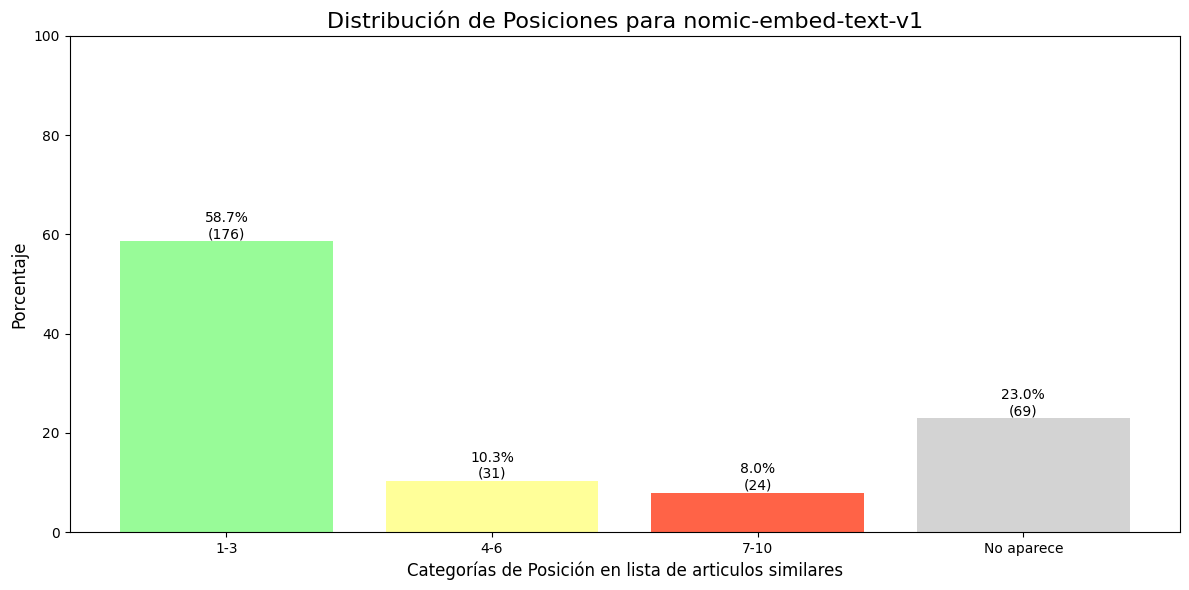

Resultados detallados:
1-3: 58.7% (176 preguntas)
4-6: 10.3% (31 preguntas)
7-10: 8.0% (24 preguntas)
No aparece: 23.0% (69 preguntas)


In [155]:
# Función para categorizar las posiciones
def categorizar_posicion(pos):
    if pos == -1:
        return 'No aparece'
    elif 1 <= pos <= 3:
        return '1-3'
    elif 4 <= pos <= 6:
        return '4-6'
    elif 7 <= pos <= 10:
        return '7-10'
    else:
        return 'No aparece'

# Aplicar la categorización
resultados_df['Categoria'] = resultados_df['Posicion'].apply(categorizar_posicion)

# Calcular los porcentajes y conteos
conteo = resultados_df['Categoria'].value_counts()
porcentajes = (conteo / len(resultados_df)) * 100

# Ordenar las categorías
orden_categorias = ['1-3', '4-6', '7-10', 'No aparece']
conteo = conteo.reindex(orden_categorias)
porcentajes = porcentajes.reindex(orden_categorias)

# Crear el gráfico
plt.figure(figsize=(12, 6))
colores = ['#98FB98', '#FFFF99', '#FF6347', '#D3D3D3']  # Verde, Amarillo pastel, Rojo oscuro, Gris (pasteles)
barras = plt.bar(porcentajes.index, porcentajes.values, color=colores)

plt.title('Distribución de Posiciones para nomic-embed-text-v1', fontsize=16)
plt.xlabel('Categorías de Posición en lista de articulos similares', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.ylim(0, 100)

# Añadir etiquetas de porcentaje encima de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura,
             f'{altura:.1f}%\n({int(altura*len(resultados_df)/100)})',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Imprimir resultados detallados
print("Resultados detallados:")
for categoria, porcentaje in porcentajes.items():
    num_preguntas = int(porcentaje * len(resultados_df) / 100)
    print(f"{categoria}: {porcentaje:.1f}% ({num_preguntas} preguntas)")
